In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clockPercentages.csv', index_col=0)

In [3]:
df['3PPP'] = df['3FG']*3
df['2PPP'] = df['2FG']*2
df['PPP'] = (df['3PPP'] + df['2PPP'])/2
df['EPPP'] = df['EFG']*2
df['MaxPPP'] = df[['3PPP', '2PPP']].max(axis=1)

In [4]:
df

,FG,EFG,3FG,2FG,3PPP,2PPP,PPP,EPPP,MaxPPP
24-22,0.571675,0.580069,0.350515,0.582800,1.051546,1.165601,1.108574,1.160138,1.165601
22-18 Very Early,0.521794,0.597643,0.373524,0.623189,1.120573,1.246379,1.183476,1.195286,1.246379
18-15 Early,0.470212,0.547588,0.374401,0.537714,1.123204,1.075428,1.099316,1.095175,1.123204
15-7 Average,0.460125,0.529801,0.368748,0.515634,1.106244,1.031268,1.068756,1.059602,1.106244
7-4 Late,0.434039,0.499776,0.351049,0.483730,1.053147,0.967460,1.010304,0.999551,1.053147
4-0 Very Late,0.355214,0.413154,0.262431,0.428579,0.787292,0.857157,0.822225,0.826308,0.857157


In [5]:
df.index=[23, 20, 16.5, 11, 5.5, 2]

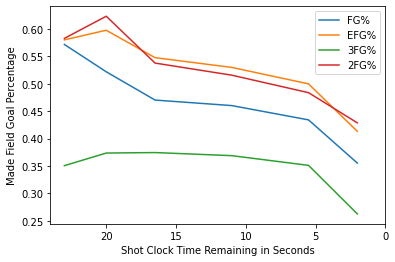

In [6]:
ax = df.plot(y = ['FG', 'EFG', '3FG', '2FG'],\
        label=['FG%', 'EFG%', '3FG%', '2FG%'],\
        xlim=(24, 0), xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Made Field Goal Percentage')

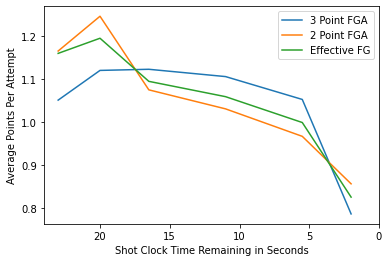

In [7]:
ax = df.plot(y=['3PPP', '2PPP', 'EPPP'],\
        label=['3 Point FGA',\
            '2 Point FGA',\
            'Effective FG'],\
        xlim=(24, 0), xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')

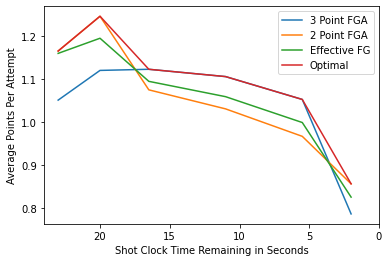

In [8]:
y = np.linspace(0, 24)
ax = df.plot(y=['3PPP', '2PPP', 'EPPP', 'MaxPPP'],\
        label=['3 Point FGA',\
            '2 Point FGA',\
            'Effective FG',\
            'Optimal'],\
        xlim=(24, 0), xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')

<AxesSubplot:xlabel='Shot Clock Time Remaining in Seconds', ylabel='Average Points Per Attempt'>

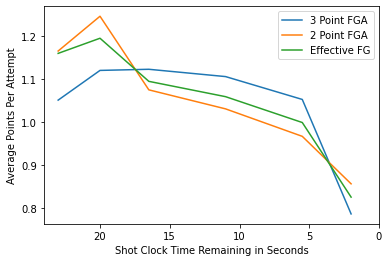

In [9]:
df.plot(y=['3PPP', '2PPP', 'EPPP'],\
        label=['3 Point FGA',\
            '2 Point FGA',\
            'Effective FG'],\
        xlim=(24, 0), xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')

<AxesSubplot:xlabel='Shot Clock Time Remaining in Seconds', ylabel='Average Points Per Attempt'>

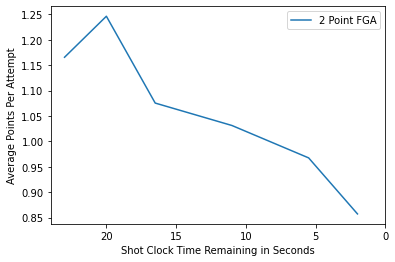

In [10]:
df.plot(y=['2PPP'], label=['2 Point FGA'], xlim=(24,0),\
        xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')

            2
-0.0002996 x + 0.02322 x + 0.8231


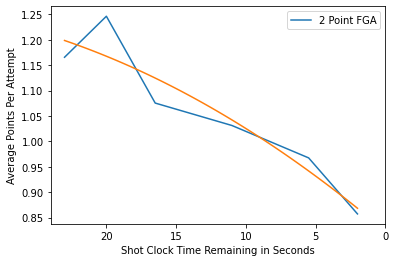

In [11]:
x = np.linspace(2, 23, 100)
curve2 = np.polyfit(df.index, df['2PPP'], 2)
y2 = np.poly1d(curve2)(x)
df.plot(y=['2PPP'], label=['2 Point FGA'], xlim=(24,0),\
        xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')
plt.plot(x, y2)
print(np.poly1d(curve2))

<AxesSubplot:xlabel='Shot Clock Time Remaining in Seconds', ylabel='Average Points Per Attempt'>

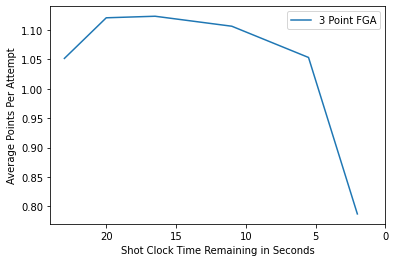

In [12]:
df.plot(y=['3PPP'], label=['3 Point FGA'], xlim=(24,0),\
        xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')

            4            3           2
-2.174e-05 x + 0.001204 x - 0.02408 x + 0.2071 x + 0.4607


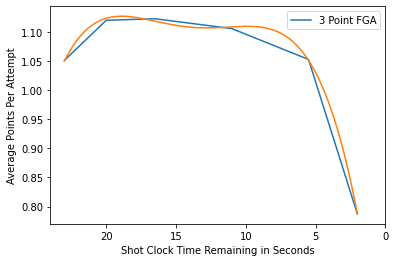

In [13]:
curve3 = np.polyfit(df.index, df['3PPP'], 4)
y3 = np.poly1d(curve3)(x)
df.plot(y=['3PPP'], label=['3 Point FGA'], xlim=(24,0),\
        xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')
plt.plot(x, y3)
print(np.poly1d(curve3))

            4            3           2
-2.055e-05 x + 0.001099 x - 0.02024 x + 0.1596 x + 0.5773


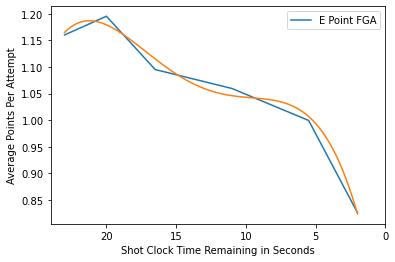

In [14]:
curveE = np.polyfit(df.index, df['EPPP'], 4)
yE = np.poly1d(curveE)(x)
df.plot(y=['EPPP'], label=['E Point FGA'], xlim=(24,0),\
        xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')
plt.plot(x, yE)
print(np.poly1d(curveE))

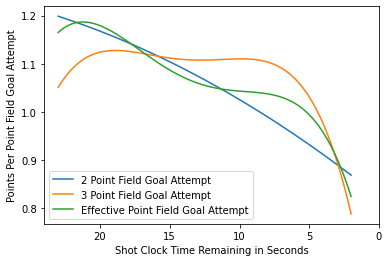

In [15]:
plt.plot(x, y2, label='2 Point Field Goal Attempt')
plt.plot(x, y3, label='3 Point Field Goal Attempt')
plt.plot(x, yE, label='Effective Point Field Goal Attempt')
ax = plt.gca()
ax.set_xlim(24, 0)
ax.set_xlabel('Shot Clock Time Remaining in Seconds')
ax.set_ylabel('Points Per Point Field Goal Attempt')
ax.legend()

Text(0, 0.5, 'Points Per 2 Point Field Goal Attempt')

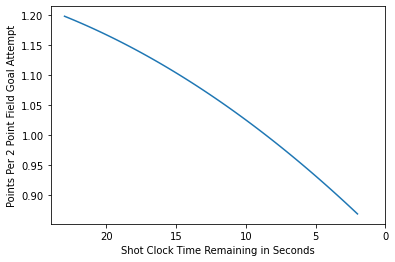

In [16]:
plt.plot(x, y2, label='Points Per 2 Point Field Goal Attempt')
ax = plt.gca()
ax.set_xlim(24, 0)
ax.set_xlabel('Shot Clock Time Remaining in Seconds')
ax.set_ylabel('Points Per 2 Point Field Goal Attempt')

          4            3           2
-2.8e-05 x + 0.001473 x - 0.02659 x + 0.2004 x + 0.5477


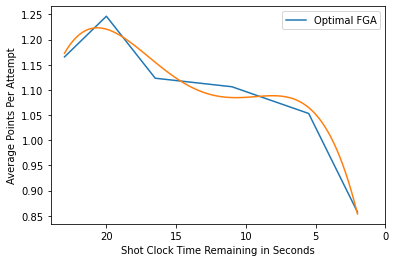

In [17]:
curveMax = np.polyfit(df.index, df['MaxPPP'], 4)
yMax = np.poly1d(curveMax)(x)
df.plot(y=['MaxPPP'], label=['Optimal FGA'], xlim=(24,0),\
        xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')
plt.plot(x, yMax)
print(np.poly1d(curveMax))

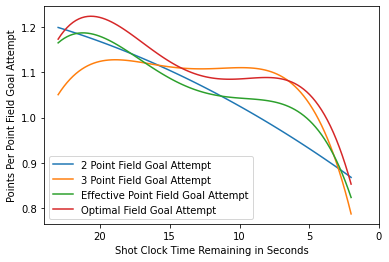

In [18]:
plt.plot(x, y2, label='2 Point Field Goal Attempt')
plt.plot(x, y3, label='3 Point Field Goal Attempt')
plt.plot(x, yE, label='Effective Point Field Goal Attempt')
plt.plot(x, yMax, label='Optimal Field Goal Attempt')
ax = plt.gca()
ax.set_xlim(24, 0)
ax.set_xlabel('Shot Clock Time Remaining in Seconds')
ax.set_ylabel('Points Per Point Field Goal Attempt')
ax.legend()

<AxesSubplot:xlabel='Shot Clock Time Remaining in Seconds', ylabel='Average Points Per Attempt'>

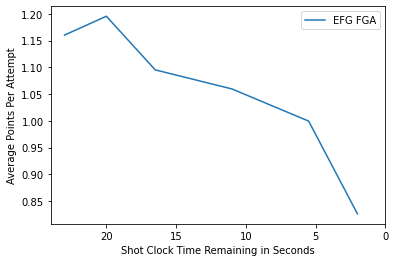

In [19]:
df.plot(y=['EPPP'], label=['EFG FGA'], xlim=(24,0),\
        xlabel='Shot Clock Time Remaining in Seconds',\
        ylabel='Average Points Per Attempt')